In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

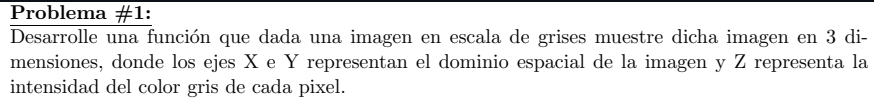

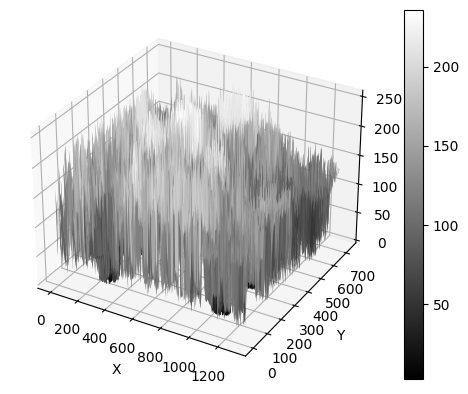

In [6]:
def mostrar_imagen_3d(imagen_gris):
    # Obtener dimensiones de la imagen
    alto, ancho = imagen_gris.shape
    
    # Crear malla de coordenadas X e Y
    x = np.arange(0, ancho, 1)
    y = np.arange(0, alto, 1)
    x, y = np.meshgrid(x, y)
    
    # Crear una figura 3D
    figura = plt.figure()
    eje_3d = figura.add_subplot(111, projection='3d')
    
    # Convertir la imagen en una matriz de coordenadas Z
    z = imagen_gris
    
    # Graficar la superficie 3D
    superficie = eje_3d.plot_surface(x, y, z, cmap='gray')
    
    # Agregar barra de colores
    figura.colorbar(superficie, ax=eje_3d)
    
    # Etiquetas de ejes
    eje_3d.set_xlabel('X')
    eje_3d.set_ylabel('Y')
    eje_3d.set_zlabel('Intensidad')
    
    # Mostrar la figura
    plt.show()


#imagen_gris = plt.imread('/workspaces/Text-mining-n-image-recogn/Guipil.jpeg')[:,:,0]
imagen_gris = plt.imread('Guipil.jpeg')[:,:,0]
mostrar_imagen_3d(imagen_gris)


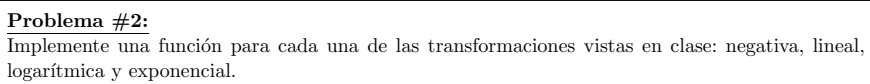

C:\Users\JEYxc\AppData\Local\Temp\ipykernel_52576\290955747.py:28: RuntimeWarning: divide by zero encountered in log
  imagen_transformada = c * np.log(1 + imagen_gris)


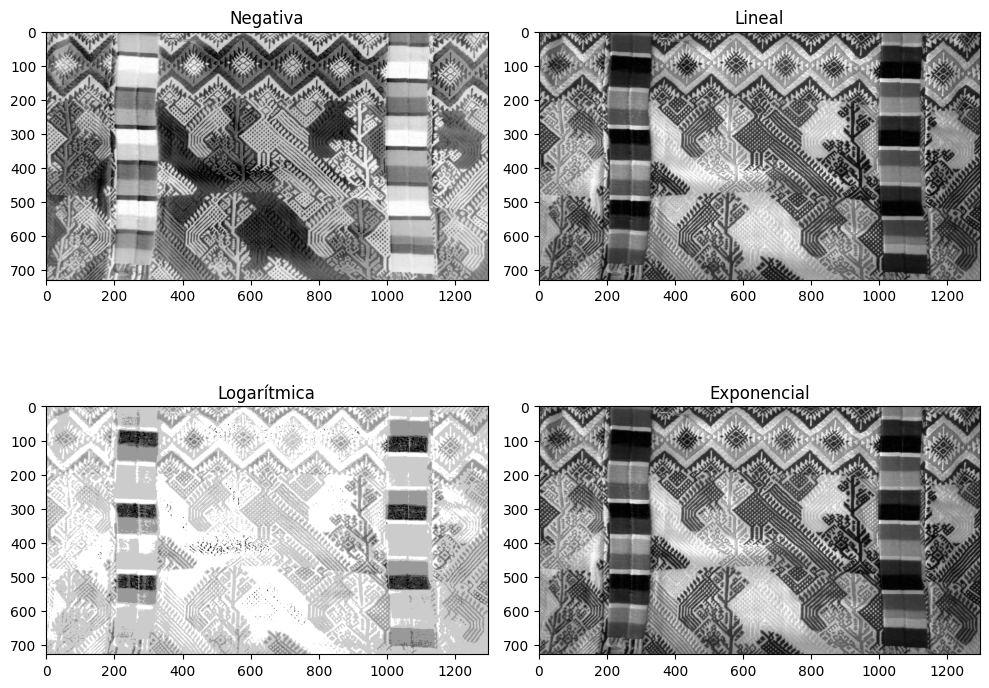

In [8]:
def negativa(imagen_gris):
    imagen_transformada = 255 - imagen_gris
    return imagen_transformada

def lineal(imagen_gris, pendiente, interseccion):
    imagen_transformada = np.clip(pendiente * imagen_gris + interseccion, 0, 255)
    return imagen_transformada.astype(np.uint8)

def logaritmica(imagen_gris, c):
    imagen_transformada = c * np.log(1 + imagen_gris)
    imagen_transformada = np.clip(imagen_transformada, 0, 255)
    return imagen_transformada.astype(np.uint8)

def exponencial(imagen_gris, c, gamma):
    imagen_transformada = c * np.power(imagen_gris, gamma)
    imagen_transformada = np.clip(imagen_transformada, 0, 255)
    return imagen_transformada.astype(np.uint8)

imagen_gris = plt.imread('Guipil.jpeg')[:,:,0]

# Aplicar las transformaciones
imagen_negativa = negativa(imagen_gris)
imagen_lineal = lineal(imagen_gris, pendiente=1, interseccion=0)
imagen_logaritmica = logaritmica(imagen_gris, c=1)
imagen_exponencial = exponencial(imagen_gris, c=1, gamma=1)

# Mostrar las imágenes transformadas
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(imagen_negativa, cmap='gray')
plt.title('Negativa')

plt.subplot(2, 2, 2)
plt.imshow(imagen_lineal, cmap='gray')
plt.title('Lineal')

plt.subplot(2, 2, 3)
plt.imshow(imagen_logaritmica, cmap='gray')
plt.title('Logarítmica')

plt.subplot(2, 2, 4)
plt.imshow(imagen_exponencial, cmap='gray')
plt.title('Exponencial')

plt.tight_layout()
plt.show()


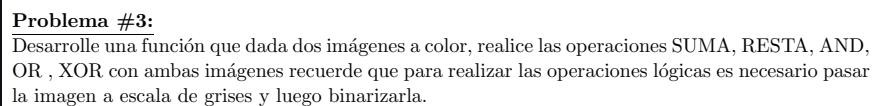

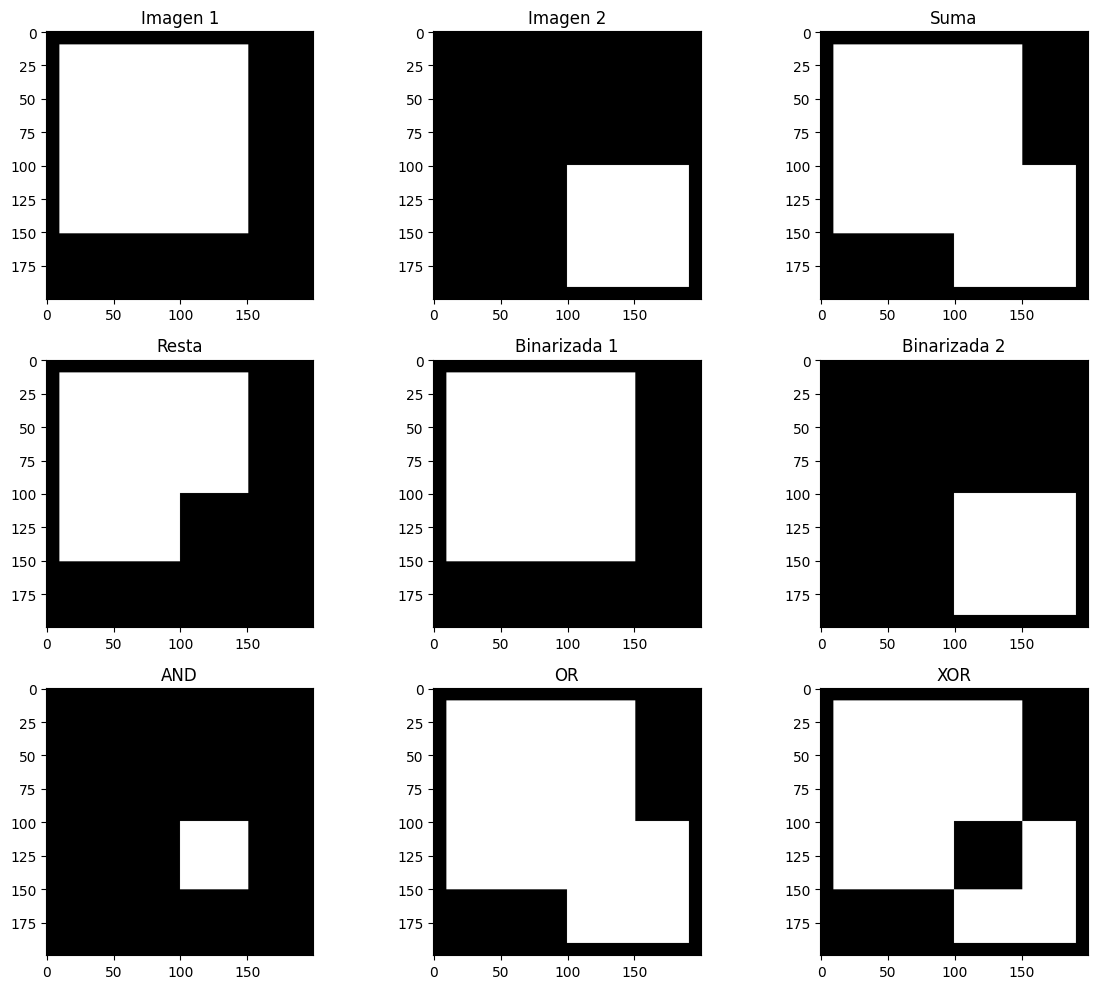

In [9]:
def color_operations(image1, image2):
    gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
    
    # Binarizar las imágenes (usando umbral de 128 para obtener valores binarios)
    _, binary_image1 = cv2.threshold(gray_image1, 128, 255, cv2.THRESH_BINARY)
    _, binary_image2 = cv2.threshold(gray_image2, 128, 255, cv2.THRESH_BINARY)
    
    
    # Realizar operaciones lógicas
    bitwise_and = cv2.bitwise_and(binary_image1, binary_image2)
    bitwise_or = cv2.bitwise_or(binary_image1, binary_image2)
    bitwise_xor = cv2.bitwise_xor(binary_image1, binary_image2)
    
    # Sumar las imágenes (usando saturación para evitar desbordamientos)
    sum_image = cv2.add(image1, image2)
    
    # Restar las imágenes (usando saturación para evitar valores negativos)
    subtract_image = cv2.subtract(image1, image2)
    
    # Mostrar las imágenes resultantes
    plt.figure(figsize=(12, 10))
    
    plt.subplot(3, 3, 1)
    plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
    plt.title('Imagen 1')
    
    plt.subplot(3, 3, 2)
    plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
    plt.title('Imagen 2')
    
    plt.subplot(3, 3, 3)
    plt.imshow(cv2.cvtColor(sum_image, cv2.COLOR_BGR2RGB))
    plt.title('Suma')
    
    plt.subplot(3, 3, 4)
    plt.imshow(cv2.cvtColor(subtract_image, cv2.COLOR_BGR2RGB))
    plt.title('Resta')
    
    plt.subplot(3, 3, 5)
    plt.imshow(binary_image1, cmap='gray')
    plt.title('Binarizada 1')
    
    plt.subplot(3, 3, 6)
    plt.imshow(binary_image2, cmap='gray')
    plt.title('Binarizada 2')
    
    plt.subplot(3, 3, 7)
    plt.imshow(bitwise_and, cmap='gray')
    plt.title('AND')
    
    plt.subplot(3, 3, 8)
    plt.imshow(bitwise_or, cmap='gray')
    plt.title('OR')
    
    plt.subplot(3, 3, 9)
    plt.imshow(bitwise_xor, cmap='gray')
    plt.title('XOR')
    
    plt.tight_layout()
    plt.show()

image1 = cv2.imread('img1.png')
image2 = cv2.imread('img2.png')

# Aplicamos las operaciones
color_operations(image1, image2)


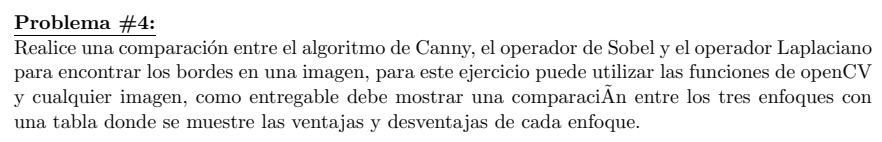

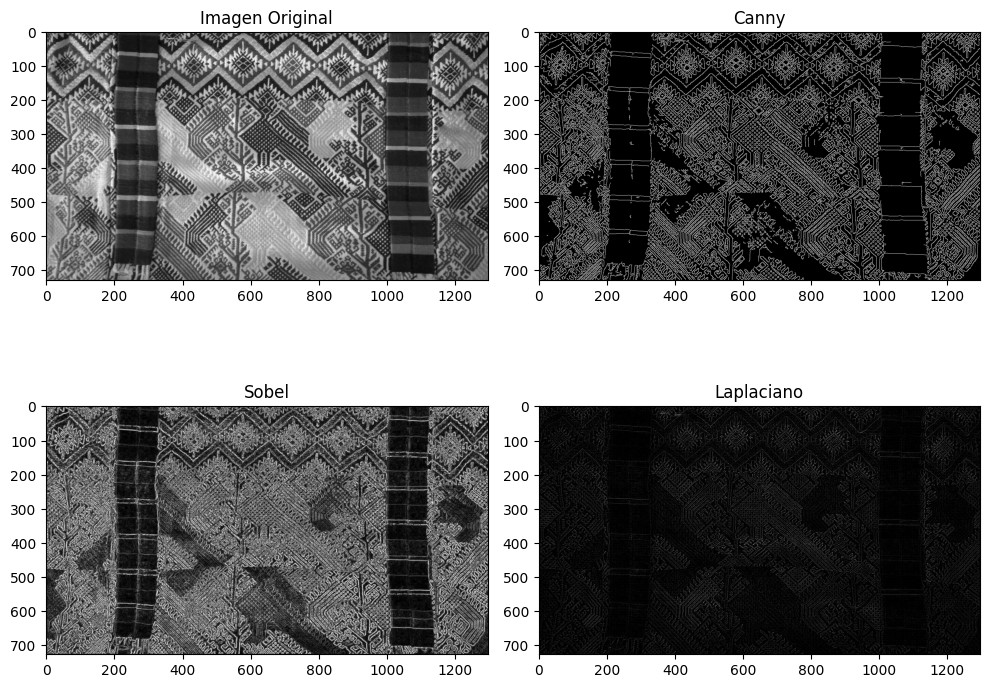

In [12]:
# Cargar la imagen
image_path = 'Guipil.jpeg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Aplicar el algoritmo de Canny
canny_edges = cv2.Canny(image, threshold1=100, threshold2=200)

# Aplicar el operador de Sobel
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
sobel_edges = np.sqrt(sobel_x**2 + sobel_y**2).astype(np.uint8)

# Aplicar el operador Laplaciano
laplacian_edges = cv2.Laplacian(image, cv2.CV_8U)

# Crear una figura para mostrar las imágenes
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagen Original')

plt.subplot(2, 2, 2)
plt.imshow(canny_edges, cmap='gray')
plt.title('Canny')

plt.subplot(2, 2, 3)
plt.imshow(sobel_edges, cmap='gray')
plt.title('Sobel')

plt.subplot(2, 2, 4)
plt.imshow(laplacian_edges, cmap='gray')
plt.title('Laplaciano')

plt.tight_layout()
plt.show()


In [14]:
print("Comparación de enfoques:")
print("| Enfoque     | Ventajas                             | Desventajas                            |")
print("|-------------|--------------------------------------|----------------------------------------|")
print("| Canny       | Detecta bordes con alta precisión    | Implica el calculo de gradiente y      |")
print("|             | precisión y minimos falsos           | supresión de no máximos, lo que puede  |")
print("|             |                                      | hacerlo más lento                      |")
print("|-------------|--------------------------------------|----------------------------------------|")
print("| Sobel       | Simple, computacionalmente eficiente | Sensible al ruido, puede               |")
print("|             | proporciona información sobre el     | generar falsos positivos.              |")
print("|             | gradiente lo que puede ser útil      |                                        |")
print("|-------------|--------------------------------------|----------------------------------------|")
print("| Laplaciano  | Puede detectar cambios bruscos en    | Sensible al ruido, produce bordes      |")
print("|             | la intensidad de los píxeles.        | gruesos y mal conectados.              |")
print("|-------------|--------------------------------------|----------------------------------------|")


Comparación de enfoques:
| Enfoque     | Ventajas                             | Desventajas                            |
|-------------|--------------------------------------|----------------------------------------|
| Canny       | Detecta bordes con alta precisión    | Implica el calculo de gradiente y      |
|             | precisión y minimos falsos           | supresión de no máximos, lo que puede  |
|             |                                      | hacerlo más lento                      |
|-------------|--------------------------------------|----------------------------------------|
| Sobel       | Simple, computacionalmente eficiente | Sensible al ruido, puede               |
|             | proporciona información sobre el     | generar falsos positivos.              |
|             | gradiente lo que puede ser útil      |                                        |
|-------------|--------------------------------------|----------------------------------------|
| Laplaciano  |

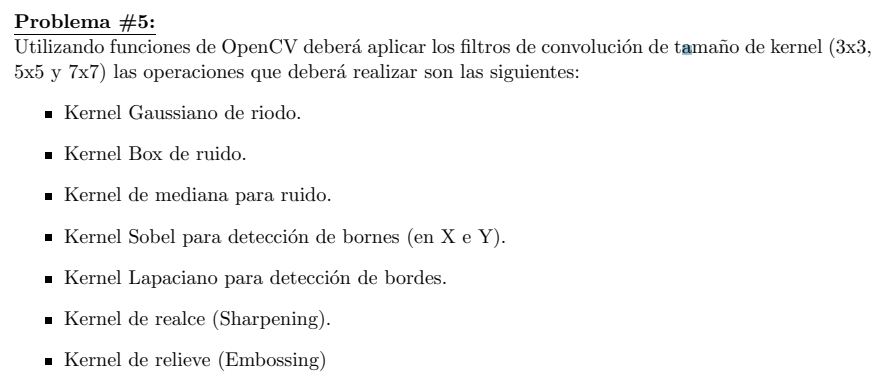

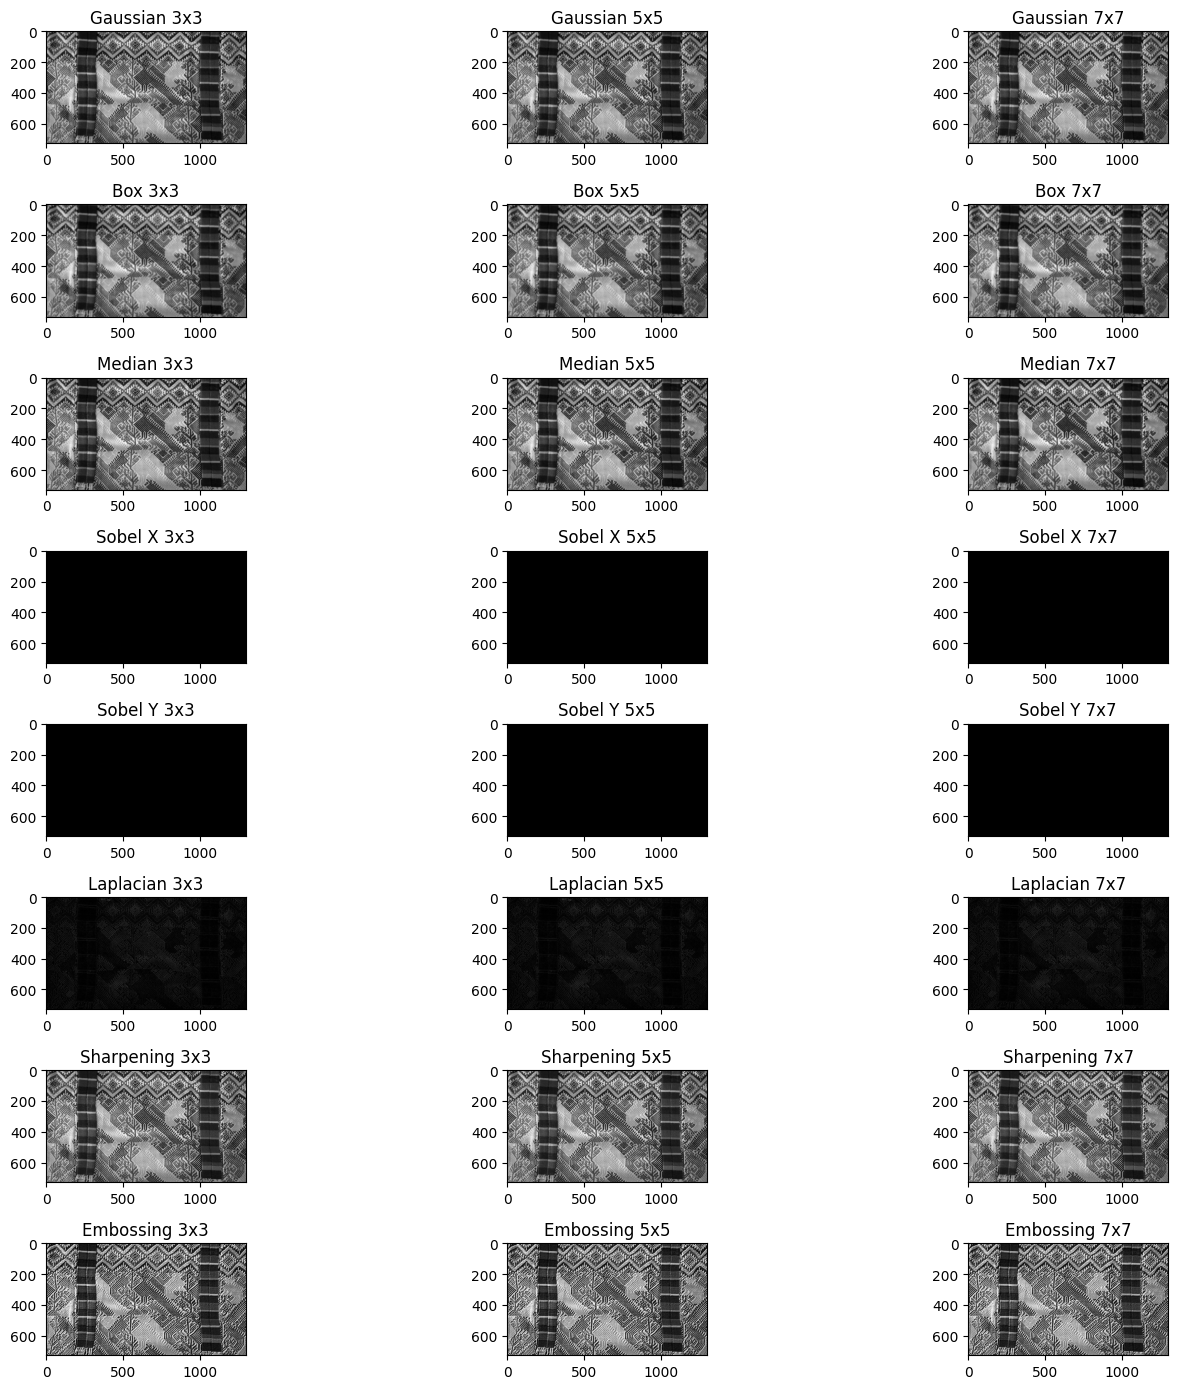

In [24]:
image_path = 'Guipil.jpeg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Define kernel sizes
kernel_sizes = [3, 5, 7]

# Define kernels
gaussian_kernel = cv2.getGaussianKernel(7, 1.5)
box_kernel = np.ones((7, 7), np.float32) / 49
median_kernel = np.ones((7, 7), np.uint8)
sobel_x_kernel = cv2.Sobel(image, cv2.CV_8U, 1, 0, ksize=3)
sobel_y_kernel = cv2.Sobel(image, cv2.CV_8U, 0, 1, ksize=3)
laplacian_kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]], np.float32)
sharpening_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], np.float32)
embossing_kernel = np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]], np.float32)

# Apply convolution filters
results = []

for size in kernel_sizes:
    gaussian_filtered = cv2.filter2D(image, cv2.CV_8U, gaussian_kernel)
    box_filtered = cv2.filter2D(image, cv2.CV_8U, box_kernel)
    median_filtered = cv2.medianBlur(image, size)
    sobel_x_filtered = cv2.filter2D(image, cv2.CV_8U, sobel_x_kernel)
    sobel_y_filtered = cv2.filter2D(image, cv2.CV_8U, sobel_y_kernel)
    laplacian_filtered = cv2.filter2D(image, cv2.CV_8U, laplacian_kernel)
    sharpened = cv2.filter2D(image, cv2.CV_8U, sharpening_kernel)
    embossed = cv2.filter2D(image, cv2.CV_8U, embossing_kernel)
    
    results.append((gaussian_filtered, box_filtered, median_filtered, sobel_x_filtered,sobel_y_filtered, laplacian_filtered, sharpened, embossed))

# Show the results
plt.figure(figsize=(15, 14))

for i, size in enumerate(kernel_sizes):
    plt.subplot(8, len(kernel_sizes), i+1)
    plt.imshow(results[i][0], cmap='gray')
    plt.title(f'Gaussiano {size}x{size}')
    
    plt.subplot(8, len(kernel_sizes), i+1+len(kernel_sizes))
    plt.imshow(results[i][1], cmap='gray')
    plt.title(f'Box {size}x{size}')
    
    plt.subplot(8, len(kernel_sizes), i+1+2*len(kernel_sizes))
    plt.imshow(results[i][2], cmap='gray')
    plt.title(f'Mediana {size}x{size}')
    
    plt.subplot(8, len(kernel_sizes), i+1+3*len(kernel_sizes))
    plt.imshow(results[i][3], cmap='gray')
    plt.title(f'Sobel X {size}x{size}')
    
    plt.subplot(8, len(kernel_sizes), i+1+4*len(kernel_sizes))
    plt.imshow(results[i][4], cmap='gray')
    plt.title(f'Sobel Y {size}x{size}')
    
    plt.subplot(8, len(kernel_sizes), i+1+5*len(kernel_sizes))
    plt.imshow(results[i][5], cmap='gray')
    plt.title(f'Laplaciano {size}x{size}')
    
    plt.subplot(8, len(kernel_sizes), i+1+6*len(kernel_sizes))
    plt.imshow(results[i][6], cmap='gray')
    plt.title(f'Re {size}x{size}')
    
    plt.subplot(8, len(kernel_sizes), i+1+7*len(kernel_sizes))
    plt.imshow(results[i][7], cmap='gray')
    plt.title(f'Embossing {size}x{size}')

plt.tight_layout()
plt.show()
